# Case Study on ANOVA

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data 
sales_data=pd.read_csv(r'C:/Users/DELNA.RAPHEL/Desktop/DSA/Assignment_week_09/Sales_data_zone_wise.csv')
#displaying the dataset(5 rows)
sales_data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


- The data consists of the sales generated by 4 zones for each month.

In [3]:
#displaying the various information of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
#displaying the statistical measures
sales_data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#### XYZ Company has offices in four different zones. The company wishes to investigate the following :
- 1.The mean sales generated by each zone.

In [5]:
mean_by_zone=sales_data.mean()
print('The mean sales generated by each zone is\n\n',mean_by_zone)


The mean sales generated by each zone is

 Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64


###### - Boxplot

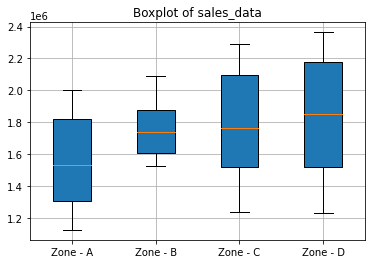

In [6]:
data=sales_data.drop(['Month'],axis=1)
labels=data.columns
plt.boxplot(x=data,patch_artist=True,labels=labels,meanline=True)
plt.title('Boxplot of sales_data')
plt.grid()

##### ●2. Total sales generated by all the zones for each month.

In [7]:
#adding a new column named Total which is the sum of sales by all 4 zones.
sales_data['Total']=sales_data['Zone - A']+sales_data['Zone - B']+sales_data['Zone - C']+sales_data['Zone - D']
print('Total sales generated by all the zones for each month is')
sales_data

Total sales generated by all the zones for each month is


,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


##### ● 3.Check whether all the zones generate the same amount of sales.
Help the company to carry out their study with the help of data provided.

- We need to perform ANOVA test.

-Independent variables are the amount of sales generated by Zone - A,Zone - B,Zone - C,	Zone - D.
-As we are having 4 independent variables and to compare the mean of them , consider one-way ANOVA.

* Null Hypothesis-The mean of the amount of sales generated by Zone - A,Zone - B,Zone - C,	Zone - D are equal.
* Alternate Hypothesis -The mean is not equal. 
*- α = 0.05

#### One-Way ANOVA

In [8]:
#One-way ANOVA can be performed by scipy.stats.f_oneway function in scipy.It returns f-statistic and p-value.
import scipy 
from scipy import stats
F_statistic,p=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

print('F-statistic=',round(F_statistic,3))
print('p-value=',round(p,3))

F-statistic= 5.672
p-value= 0.001


In [9]:
if p<0.05:
    print('Reject null Hypothesis.')
else:
    print('Accept null hypothesis.')


Reject null Hypothesis.


The mean of the amount of sales generated by Zone - A,Zone - B,Zone - C,	Zone - D are not equal.
- The F critical is determined by
  - Numerator degrees of freedom(dfn)=4-1=3
  - Denominator degrees of freedom(dfd)=29*4-4=112
  - q=1-alpha value(0.05).

In [10]:
# using scipy.stats.f(dfn, dfd).ppf(q) function for finding Fcritical value.
f_critical_value=scipy.stats.f(3,112).ppf(1-0.05)
f_critical_value

2.6856434512366034

In [11]:
if F_statistic>f_critical_value:
    print('Reject null Hypothesis.')
else:
    print('Accept null hypothesis.')


Reject null Hypothesis.


The mean of the amount of sales generated by Zone - A,Zone - B,Zone - C,	Zone - D are not equal.